In [0]:
x1 = (-1, 1)
x2 = (0, -1)
x3 = (5, 5)
x4 = (10, 5)
x5 = (0, 3)
x6 = (4, -5)

points = [x1, x2, x3, x4, x5, x6]
y1 = 1
y2 = 1
y3 = -1
y4 = -1
y5 = 1
y6 = 1
outputs = [y1, y2, y3, y4, y5, y6]

In [0]:
def loss_function(decision_boundary):
  loss = decision_boundary
  indicator_function_output = 1 if loss > 0 else -1 if loss < 0 else 0
  return loss, indicator_function_output

In [0]:
def calculate_dot_product(weight, input_point):
  dot_product = sum([i*j for i,j in zip(weight, input_point)])
  return dot_product

In [0]:
def decision_boundary(weight, input_point, bias=0):
  dot_product = calculate_dot_product(weight, input_point)
  decision_boundary = dot_product + bias
  return decision_boundary

In [0]:
def update_weight(current_weight, output, point):
   # print(current_weight, point, output)
    new_point = tuple(i*output for i in point)
   # print(new_point)
    new_weight = (current_weight[0]+new_point[0], current_weight[1]+new_point[1])
   # print(new_weight)
    return new_weight

In [0]:
def update_bias(output, bias):
    new_bias = bias+output
    return new_bias

In [0]:
def linear_classifier(points, outputs):
  weight = (0,0)
  input_point = (0,0)
  bias = 0
  current_decision_boundary = 0
  indicator_list = list(range(0, len(points)))
  signed_distance = -1
  termination = (outputs == indicator_list)
  while termination == False:
    for index, point in enumerate(points): 
      current_decision_boundary = decision_boundary(weight, point, bias)
      loss, indicator_output = loss_function(current_decision_boundary)
      magnitude = (weight[0]**2+weight[1]**2)**(0.5)
      if magnitude != 0:
        signed_distance = (outputs[index]*current_decision_boundary)/magnitude
        print("signed_distance: "+str(signed_distance) +" for point: "+str(point))
        
      if signed_distance > 0:
        indicator_list.pop(index)
        indicator_list.insert(index, indicator_output)
        print("correct_classification for point: "+str(point))
        print(indicator_list)
        if outputs == indicator_list:
          termination = True
      else:
        print("current_weight: "+str(weight))
        print("current_bias: "+str(bias))
        weight = update_weight(weight, outputs[index], point)
        bias = update_bias(bias, outputs[index])
        print("updated_weight: "+str(weight))
        print("updated_bias: "+str(bias))
  return weight, bias
    


In [13]:
weight, bias = linear_classifier(points, outputs)

current_weight: (0, 0)
current_bias: 0
updated_weight: (-1, 1)
updated_bias: 1
signed_distance: 0.0 for point: (0, -1)
current_weight: (-1, 1)
current_bias: 1
updated_weight: (-1, 0)
updated_bias: 2
signed_distance: 3.0 for point: (5, 5)
correct_classification for point: (5, 5)
[0, 1, -1, 3, 4, 5]
signed_distance: 8.0 for point: (10, 5)
correct_classification for point: (10, 5)
[0, 1, -1, -1, 4, 5]
signed_distance: 2.0 for point: (0, 3)
correct_classification for point: (0, 3)
[0, 1, -1, -1, 1, 5]
signed_distance: -2.0 for point: (4, -5)
current_weight: (-1, 0)
current_bias: 2
updated_weight: (3, -5)
updated_bias: 3
signed_distance: -0.8574929257125441 for point: (-1, 1)
current_weight: (3, -5)
current_bias: 3
updated_weight: (2, -4)
updated_bias: 4
signed_distance: 1.7888543819998317 for point: (0, -1)
correct_classification for point: (0, -1)
[0, 1, -1, -1, 1, 5]
signed_distance: 1.3416407864998738 for point: (5, 5)
correct_classification for point: (5, 5)
[0, 1, -1, -1, 1, 5]
signed

In [14]:
print(weight, bias)

(-4, -8) 6


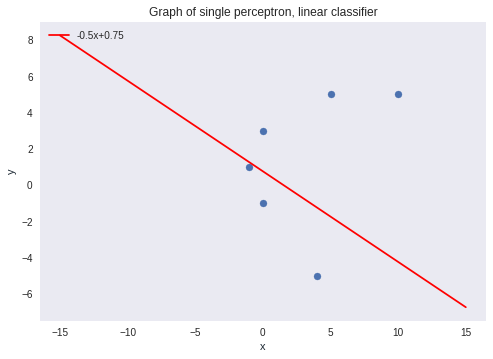

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-15,15,100)
slope = (-(bias / weight[1]) / (bias / weight[0]))
intercept =  (-bias / weight[1])
y = slope*x+intercept
plt.plot(x, y, '-r', label='{}x+{}'.format(slope, intercept))
plt.scatter(*zip(*points))
plt.title('Graph of single perceptron, linear classifier')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()
